<a href="https://colab.research.google.com/github/yelenana/machine_learning/blob/main/Rybchynska_Olena_%22HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

### **Імпорт даних**

In [223]:
import pandas as pd


In [224]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [225]:
!ls drive/MyDrive/ML/2_1/

medical-charges.csv


In [226]:
df = pd.read_csv("drive/MyDrive/ML/2_1/medical-charges.csv")

In [227]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB




---



Вирішення:
1. Однозначно я б використала фінкцію, яку рекомедує мені середовище colab під функцією df.head() - я б спробувала побудувала графіки між усіма числовими фічами (age,bmi,children) та таргетом - подивилася б чи не вимальовується між ними залежність на графіках
2.Потім зробила би те саме з категоріальними даними і таргетом, але звісно спочатку б обробила категоріальні стовпчики (оцифрувала б категорії)
3. Ну так як з лекціх ми вже бачили, що, наприклад, факт куріння впливає на charges. То спробувала б, мабуть розділити всю сукупність на 2 підсукупності за ознакою smoker, а далі б пошукала залежності між стовпчиками всередині кожної сукупності.
4.Також, мабуть, за нормами спробувала б розділити супукності в залежності вже від значення bmi на 6 категорій, як в таблиці, і подивилася б чи є залежність історичних даних charges від цих категорій:

Недостатня вага (Underweight)	< 18.5

Норма (Normal weight)	18.5 – 24.9

Надмірна вага (Overweight)	25.0 – 29.9

Ожиріння I ступеня (Obesity I)	30.0 – 34.9

Ожиріння II ступеня (Obesity II)	35.0 – 39.9

Ожиріння III ступеня (Obesity III / Morbid)	≥ 40.0



---



**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.



---
### **Вирішення**


In [229]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


In [230]:
fig_region = px.histogram(
    df,
    x='charges',
    color='region',
    barmode='group',
    marginal='box',
    nbins=50,
    title='Розподіл медичних витрат за регіоном'
)
fig_region.show()

Які можна зробити **висновки**:
1.У всіх регіонах більшість людей мають медичні витрати до 20000.
У southeast та northeast трохи більше людей з дуже високими витратами (понад 30 000).

1.   У всіх регіонах більшість людей мають медичні витрати до 20 000.

2.   У southeast та northeast трохи більше людей з дуже високими витратами (понад 30 000).
3.   Розкид витрат у всіх регіонах схожий, але northeast має більше "дорогих" випадків (видно з довшого «хвоста» аутлаерів).
4.  Найменші витрати — в southwest, найбільше — в northeast(має найвищу медіану).





In [231]:
fig_sex = px.histogram(
    df,
    x='charges',
    color='sex',
    barmode='group',
    marginal='box',
    nbins=50,
    title='Розподіл медичних витрат за статтю'
)
fig_sex.show()

Висновки:
1.   І чоловіки, і жінки здебільшого витрачають до 20 000 ( але у жінок 75 квантиль менший майже не 4,5 тис)

2.   У чоловіків трохи більше людей із високими витратами (понад 30 000), ніж у жінок.

3.   Середні витрати у чоловіків трохи вищі, але не критично.

4.   Загалом розподіл схожий, але дорогих випадків у чоловіків трохи більше.


---




**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.



---
### **Виконання:**


In [232]:
fig_reg_smoker = px.histogram(
    df,
    x='region',
    color='smoker',
    barmode='group',
    marginal='box',
    nbins=50,
    title='Розподіл курців по регіонах'
)
fig_reg_smoker.show()

### **Висновок:**
Незалежно від регіону, курців значно менше, ніж некурців. Однак, у південно-східному (southeast) регіоні курців більше, ніж в інших частинах.

In [233]:
fig_kids_smoker = px.histogram(
    df,
    x='children',
    color='smoker',
    barmode='group',
    marginal='box',
    nbins=50,
    title='Розподіл курців в залежності від кількості дітей'
)
fig_kids_smoker.show()

### **Висновок**
1.   Люди без дітей складають найбільшу частку як серед курців, так і некурців.

2.   Ймовірність бути курцем зменшується із зростанням кількості дітей.

3.   Загалом, незалежно від кількості дітей, некурців більше, ніж курців.



---



**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.



---


### **Виконання:**




In [234]:
fig_charges_kids = px.histogram(
    df,
    x='charges',
    color='children',
    barmode='group',
    marginal='box',
    nbins=25,
    title='Розподіл медичних витрат відповідно до кількісті дітей'
)
fig_charges_kids.show()

### **Висновки**
1.   Медичні витрати не мають чіткої прямої залежності від кількості дітей.
2.   Найбільше людей — з 0–2 дітьми.
3.   У категоріях з 4–5 дітьми — менше людей, але витрати можуть бути високими
4.   Візуально так виглядає, що в категорії з 0 дітей найбільша кількість айутлаєрів з дуже високими медичними витратами



---



**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [235]:
medical_df = pd.read_csv("drive/MyDrive/ML/2_1/medical-charges.csv")
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [236]:
def estimate_charges(age, w, b):
    return w * age + b

In [237]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

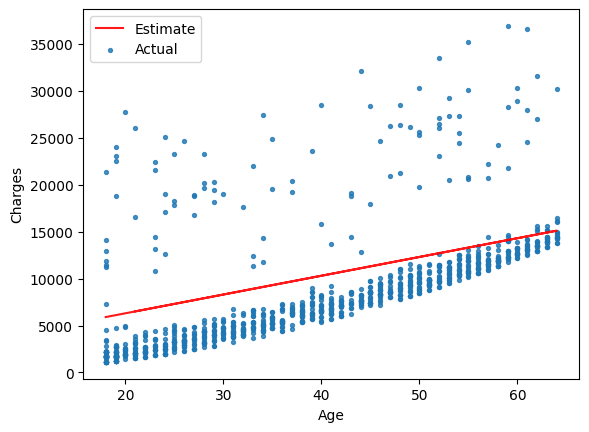

In [238]:
try_parameters(non_smoker_df, 200, 2300)

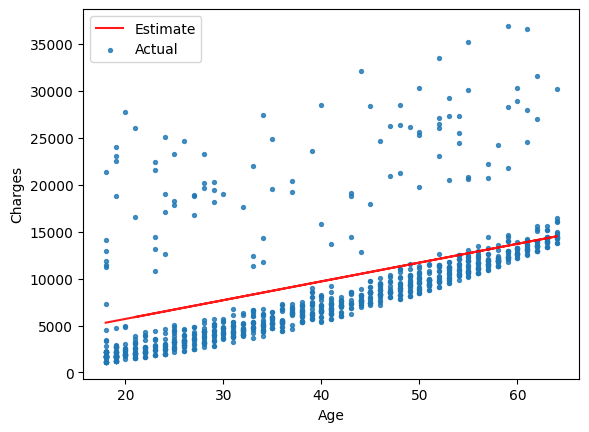

In [239]:
try_parameters(non_smoker_df, 200, 1700)

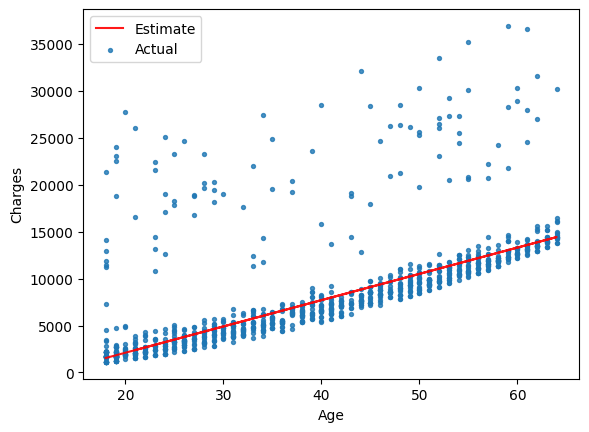

In [240]:
try_parameters(non_smoker_df, 280, -3500)

### **Спостереження**:

для підбору прямої потрібно спочатку підбрати значення  w, яке відповідає за кут нахилу, а потім вже підбирати значення b, яке по суті видповідає за положення лінії по вертикалі, тобто збільшуючи значення b ми паралельно пересуваємо пряму вверх, а зменшуючи - відповідно рухаємо вниз


---



**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [241]:
import numpy as np

In [242]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [279]:
w = 280
b = -2600

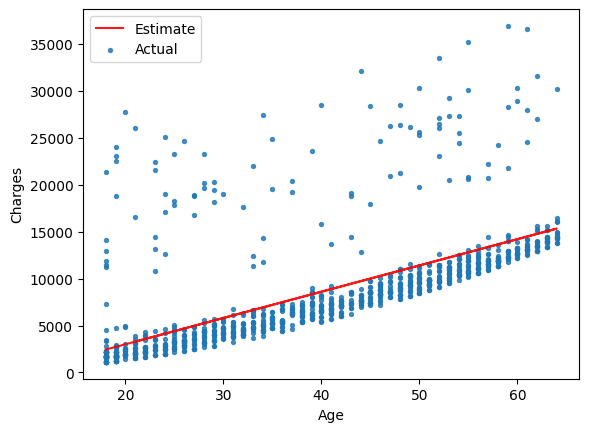

In [280]:
try_parameters(non_smoker_df, w, b)

In [272]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [273]:
rmse(targets, predicted)

np.float64(4665.963874569783)

In [274]:
predicted1 = estimate_charges(non_smoker_df.age, 280, -2500)

In [275]:
predicted2 = estimate_charges(non_smoker_df.age, 280, -2700)

In [276]:
rmse(targets, predicted)

np.float64(4665.963874569783)

In [277]:
rmse(targets, predicted1)

np.float64(4666.898773981223)

In [278]:
rmse(targets, predicted2)

np.float64(4667.1719050184)

### **Висновок**
В результаті кількох підборів відхилила ті значення, які отримала у попередньому завданні. Зупинилася на значеннях w = 280 та b = -2600, так як перевірка з близлежачими значеннями (predicted1, predicted2) вже дала трохи більші похибки. А взагалі для даного графіку помилка всеодно буде висока 4665.96, так як багато аутлаєрів.